<a href="https://colab.research.google.com/github/AsafEl94/Asaf-The--Project-Guy/blob/main/Copy_of_ML_Modeling_mini_project_Asaf_%26_Shlomi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline



Customer spending refers to the amount of money that customers invest or allocate for purchasing goods and services. It is a crucial aspect of consumer behavior and plays a significant role in driving economic growth. Understanding customer spending patterns and trends is essential for businesses, marketers, and policymakers.

Customer spending can vary across different factors such as demographics, income levels, age groups, and preferences. Generally, customers tend to spend more when they have higher disposable income or when they perceive a product or service as valuable and necessary.

**Name :** The name of the customer (textual data)
**Age :** The age of the customer (numeric data).
**Gender :** The gender of the customer (categorical data).
**Education : **The highest level of education attained by the customer (categorical data).
**Income :** The annual income of the customer (numeric data).
**Country :** The country of origin of the customer (textual data).
**Purchase_frequency :** The frequency of customer purchases, ranging from 0.1 to 1.0 (numeric data).
**Spending : **The annual spending of the customer, calculated based on various factors (numeric data).

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Shlomi - NAYA -ML/Pandas Project Asaf & Shlomi/customer_data.csv')
data

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [ ]:
def fill_missing_value(data):

  for index, row in data.iterrows():
      # Check if the 2021 value is missing
      if pd.isnull(row['2021']):
          # Find the latest available value before 2021
          for year in range(2020, 1959, -1):
              if not pd.isnull(row[str(year)]):
                  # Copy the latest available value to fill the missing 2021 value
                  data.at[index, '2021'] = row[str(year)]
                  break
  return data

In [ ]:
gdp = pd.read_csv('/content/drive/MyDrive/Shlomi - NAYA -ML/Pandas Project Asaf & Shlomi/country_gdp.csv')
columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code']
gdp.drop(columns_to_drop, axis=1, inplace=True)
gdp = fill_missing_value(gdp)
gdp

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860,NaN
1,Africa Eastern and Southern,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,701.714878,NaN
263,South Africa,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776,NaN
264,Zambia,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633,NaN
265,Zimbabwe,276.643363,279.332656,275.966139,277.532515,282.376856,294.893605,279.337779,295.056449,302.802871,...,1408.367810,1407.034293,1410.329174,1421.787789,1192.107012,2269.177012,1421.868596,1372.696674,1773.920411,NaN


In [ ]:
education_mapper = {"High School":0, "Bachelor":1, "Master":2, "PhD":3}
gender_mapper = {'Female':0 , 'Male':1 }

def preprocess_df(df):

  df = data.copy()
  df.set_index('name',inplace=True)
  gdp = pd.read_csv('/content/drive/MyDrive/Shlomi - NAYA -ML/Pandas Project Asaf & Shlomi/country_gdp.csv')

  # Drop unnecessary columns from the 'gdp' DataFrame
  columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code']
  gdp.drop(columns_to_drop, axis=1, inplace=True)

  # Perform any necessary steps to fill missing values in the 'gdp' DataFrame
  gdp = fill_missing_value(gdp)
  gdp = gdp.rename(columns={'Country Name': 'country', '2021': 'gdp_per_capita'})
  gdp = gdp[['country','gdp_per_capita']]

  # Perform a left join to merge 'data' and 'gdp' DataFrames on 'country' column
  df = pd.merge(df, gdp, on='country',how='left')

  # Fill missing values in 'gdp_per_capita' column with the median
  median_gdp = df['gdp_per_capita'].median()
  df['gdp_per_capita'] = df['gdp_per_capita'].fillna(median_gdp)

  df = df.drop('country',axis=1)
  # Perform mapping operations on 'education' and 'gender' columns
  df["education"] = df["education"].map(education_mapper)
  df["gender"] = df["gender"].map(gender_mapper)
  df["gender"] = df["gender"].astype("category")

  return df

In [ ]:
df = preprocess_df(data)
df

,age,gender,education,income,purchase_frequency,spending,gdp_per_capita
0,42,0,0,53936,0.9,13227.120,29291.400620
1,49,0,2,82468,0.6,12674.040,29342.100860
2,55,1,1,56941,0.3,5354.115,31551.816410
3,24,0,1,60651,0.2,2606.510,12083.888150
4,64,1,2,81884,0.9,18984.780,1137.343633
...,...,...,...,...,...,...,...
995,42,0,3,98170,0.7,17435.950,7143.310548
996,39,1,0,59174,0.9,11662.830,643.790042
997,50,1,2,59808,0.4,7196.160,9230.178316
998,50,0,2,58272,0.7,13939.520,31551.816410


Text(0.5, 1.0, 'Spending Distribution')

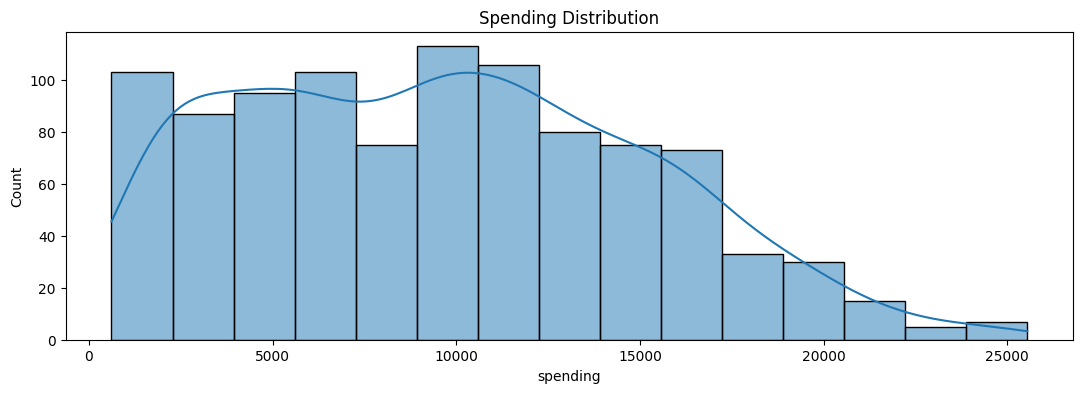

In [ ]:
fig = plt.subplots(figsize=(13,4))
plt.subplot()
ax=sns.histplot(data=df,x='spending',kde=True,edgecolor='k')
ax.bar_label(ax.containers[0])
ax.set_title('Spending Distribution')

Text(0.5, 1.0, 'Income Distribution')

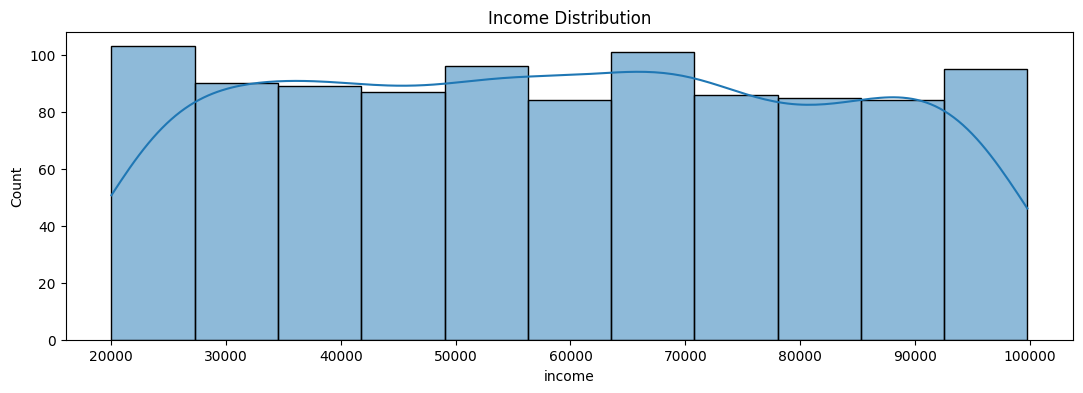

In [ ]:
fig = plt.subplots(1,1,figsize=(13,4))
plt.subplot()
ax=sns.histplot(data=df,x='income',kde=True,edgecolor='k')
ax.bar_label(ax.containers[0])
ax.set_title('Income Distribution')

Text(0.5, 1.0, 'gdp per capita Distribution')

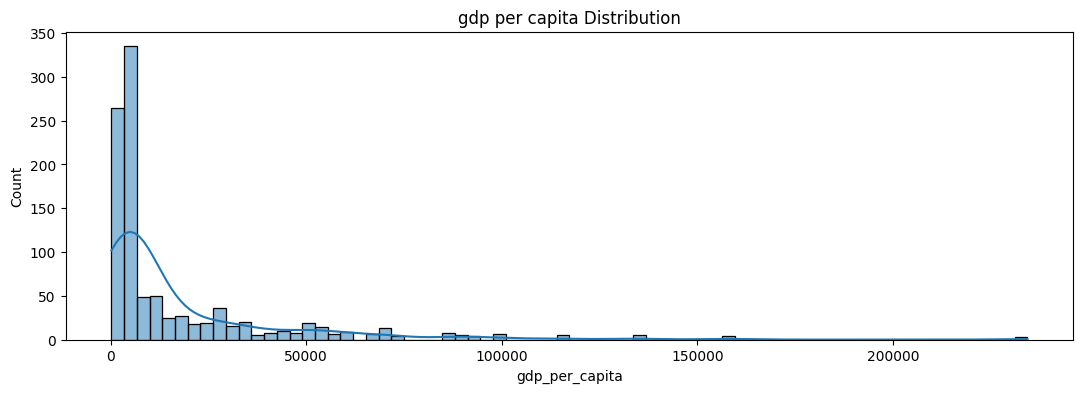

In [ ]:
fig = plt.subplots(1,1,figsize=(13,4))
plt.subplot()
ax=sns.histplot(data=df,x='gdp_per_capita',kde=True,edgecolor='k')
ax.bar_label(ax.containers[0])
ax.set_title('gdp per capita Distribution')

In [ ]:
df.groupby('education')['spending'].mean()

education
0     7521.557837
1     9522.349410
2    10167.478326
3    11251.748347
Name: spending, dtype: float64

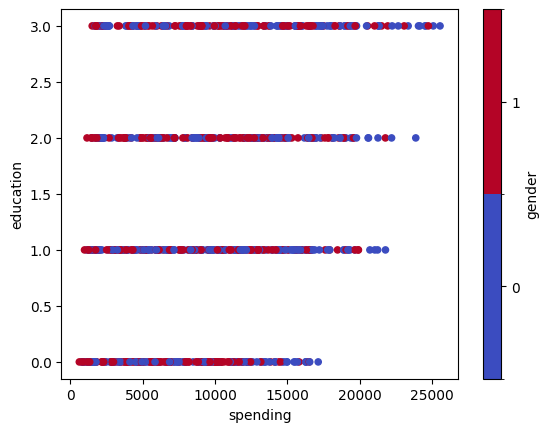

In [ ]:
ax = df.plot.scatter("spending", "education", c = "gender", cmap = "coolwarm")

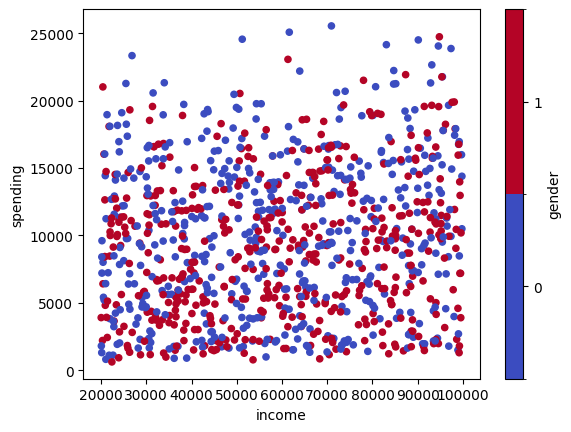

In [ ]:
ax = df.plot.scatter("income", "spending", c = "gender", cmap = "coolwarm")

In [ ]:
# missing_gdp_countries = df[df['gdp_per_capita'].isnull()]['country']
# unique_missing_gdp_countries = missing_gdp_countries.unique()
# unique_missing_gdp_countries

## Running linear Regression with all the features


In [ ]:
X, y = df.drop("spending", axis=1), df["spending"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
X_test

,age,gender,education,income,purchase_frequency,gdp_per_capita
507,59,0,2,41065,0.1,4136.146347
818,37,1,2,34914,0.3,19509.466460
452,50,0,1,22949,0.8,100172.079300
368,63,0,2,79495,0.3,4775.377454
242,41,0,0,93609,0.7,7653.171870
...,...,...,...,...,...,...
385,30,0,1,88053,0.9,6621.574336
890,58,0,0,65749,0.1,5023.274380
439,27,1,2,91325,0.1,6621.574336
135,18,0,3,21019,0.4,3150.436729


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

1842867.2914304235


In [ ]:
model.coef_

array([ 8.76536149e+01, -1.11442395e+03,  1.40345750e+03,  2.60914316e-02,
        1.74866991e+04,  5.81552279e-04])

In [ ]:
eval_df = pd.DataFrame({"prediction":y_pred,
                            "actual":y_test,
                            })
# eval_df

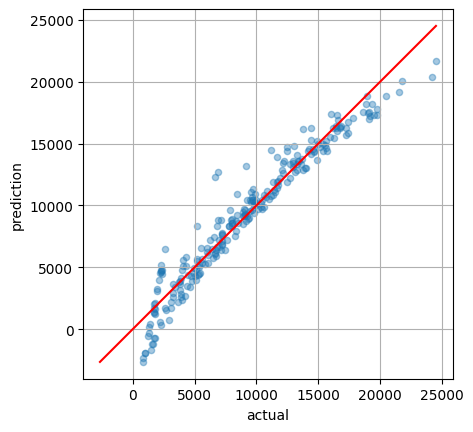

In [ ]:
def reg_plot(df):
  ax =plt.gca()
  ax = eval_df.plot.scatter("actual", "prediction", grid=True, ax=ax, alpha = 0.4)
  ax.plot([eval_df.values.min(), eval_df.values.max()],
          [eval_df.values.min(), eval_df.values.max()],
          color="red")
  return ax.set_box_aspect(1)
reg_plot(eval_df)

#Find the best feauters combintions

In [ ]:
import itertools

column_names = list(X_train.columns)
combinations = []

for r in range(1, len(column_names) + 1):
    combinations.extend(list(list(comb) for comb in itertools.combinations(column_names, r)))



In [ ]:
# len(combinations)

63

In [ ]:

def create_eval_df_multiple_cols(my_cols): #my_cols is a list.
    X_train, X_test = df_train[my_cols], df_test[my_cols]
    y_train, y_test = df_train["spending"], df_test["spending"]

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    eval_df = pd.DataFrame({"feature":[my_cols],

                            'mse_score':score
                            })
    return eval_df

In [ ]:
df_train, df_test = train_test_split(df, shuffle=True, random_state=1)
res = []
for comb in combinations:
  df2 = create_eval_df_multiple_cols(comb)
  res.append(df2)


In [ ]:
concatenated_df = pd.concat(res,axis=0)

# Reset the index of the concatenated DataFrame
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.set_index('feature',inplace=True)
# Display the concatenated DataFrame
concatenated_df

,mse_score
feature,
[age],2.735315e+07
[gender],2.857622e+07
[education],2.653106e+07
[income],2.927672e+07
[purchase_frequency],5.846209e+06
"[age, gender]",2.690702e+07
"[age, education]",2.542200e+07
"[age, income]",2.771466e+07
"[age, purchase_frequency]",4.516089e+06


In [ ]:
min_value = concatenated_df['mse_score'].min()
min_index = concatenated_df['mse_score'].idxmin()
best_score = pd.DataFrame({"feuters":min_index,
                            'mse_score':min_value
                            })

In [ ]:
best_feature = list(min_index)

In [ ]:
best_feature

['age', 'gender', 'education', 'income', 'purchase_frequency']

In [ ]:
X_train, X_test = df_train[best_feature], df_test[best_feature]
y_train, y_test = df_train["spending"], df_test["spending"]

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
score = mean_squared_error(y_test, y_pred)
best_eval_df = pd.DataFrame({"prediction":y_pred,
                        'actual':y_test
                        })

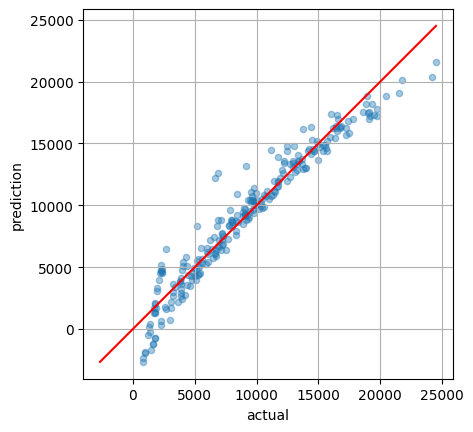

In [ ]:
reg_plot(best_eval_df)

In [ ]:
best_eval_df

,prediction,actual
507,3968.438937,2105.325
818,4259.314384,5023.710
452,13544.853731,12917.960
368,8819.150140,6892.425
242,11446.211803,11676.315
...,...,...
385,15236.427718,15662.385
890,1718.792371,1728.745
439,1355.372300,1756.625
135,6497.089490,6420.380


In [ ]:
eval_df

,prediction,actual
507,3968.438937,2105.325
818,4259.314384,5023.710
452,13544.853731,12917.960
368,8819.150140,6892.425
242,11446.211803,11676.315
...,...,...
385,15236.427718,15662.385
890,1718.792371,1728.745
439,1355.372300,1756.625
135,6497.089490,6420.380


In [ ]:
(eval_df - best_eval_df)['prediction'].sum()

0.0

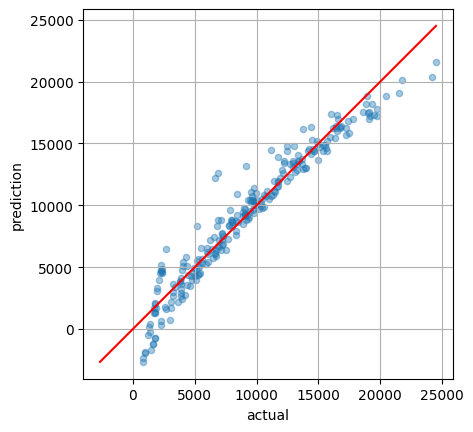

In [ ]:
reg_plot(eval_df)

In [ ]:

# X_train, X_test = df_train[best_feature], df_test[best_feature]
# y_train, y_test = df_train["spending"], df_test["spending"]

model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)
score = mean_squared_error(y_test, y_pred)
decisionTree_eval_df = pd.DataFrame({"prediction":y_pred,
                        'actual':y_test
                        })

In [ ]:
(decisionTree_eval_df - eval_df)['prediction'].sum()

11900.25833022255

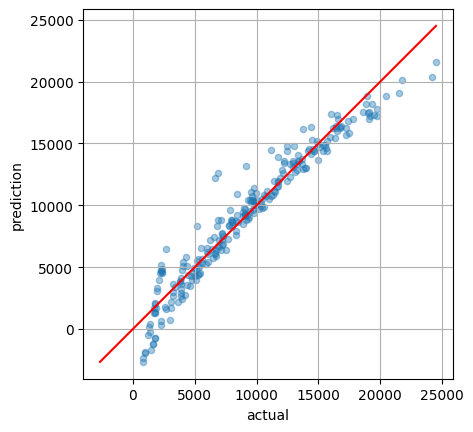

In [ ]:
reg_plot(decisionTree_eval_df)

## Trying again, This time with PPP (Purchasing Power Parity):

Long story short, PPP calculating the same basket of goods (housing, clothes, basic groceries, electronics, medical treatment etc.) in diffrent countries, comparing it to US dollars, then comparing it again to a net avarge salary in the country.
Doing so PPP is foucosing on net avarge salary and country inflation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data analytics/customer_data.csv')
data

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


In [ ]:
def fill_missing_value(data):

  for index, row in data.iterrows():
      # Check if the 2023 value is missing
      if pd.isnull(row['2023']):
          # Find the latest available value before 2023
          for year in range(2022, 1981, -1):
              if not pd.isnull(row[str(year)]):
                  # Copy the latest available value to fill the missing 2021 value
                  data.at[index, '2023'] = row[str(year)]
                  break
  return data

In [ ]:
def pre_process(ppp):
  ppp = pd.read_csv('/content/drive/MyDrive/Data analytics/country PPP.csv')
  ppp = fill_missing_value(ppp)
  ints = [*range(1980, 2023, 1)] + [*range(2024, 2029, 1)]
  columns_to_drop_ppp = [str(x) for x in ints]
  ppp.drop(columns_to_drop_ppp, axis=1, inplace=True)
  ppp.dropna(axis=0, inplace=True)
  ppp = ppp[ppp["2023"].str.contains("no data") == False]
  ppp.reset_index()
  ppp.rename(columns = {'Implied PPP conversion rate (National currency per international dollar)':'country', '2023':'ppp_2023'}
                        , inplace = True)
  return ppp


In [ ]:
ppp = pre_process(ppp)
ppp

,country,ppp_2023
2,Albania,40.256
3,Algeria,46.744
4,Andorra,0.6
5,Angola,233.971
6,Antigua and Barbuda,2.051
...,...,...
192,Vietnam,7392.805
193,West Bank and Gaza,1.843
194,Yemen,374.739
195,Zambia,6.635


Post cleaning, we'll do the same process only for PPP...

In [ ]:
education_mapper = {"High School":0, "Bachelor":1, "Master":2, "PhD":3}
gender_mapper = {'Female':0 , 'Male':1 }

def preprocess_df(df):

  df = data.copy()
  df.set_index('name',inplace=True)
  ppp = pd.read_csv('/content/drive/MyDrive/Data analytics/country PPP.csv')

  # Drop unnecessary columns from the 'ppp' DataFrame
  pre_process(ppp)

  # Perform a left join to merge 'data' and 'gdp' DataFrames on 'country' column
  df = pd.merge(df, ppp, on='country',how='left')

  # Fill missing values in 'gdp_per_capita' column with the median
  median_gdp = df['ppp_2023'].median()
  df['ppp_2023'] = df['ppp_2023'].fillna(median_gdp)

  df = df.drop('country',axis=1)
  # Perform mapping operations on 'education' and 'gender' columns
  df["education"] = df["education"].map(education_mapper)
  df["gender"] = df["gender"].map(gender_mapper)
  df["gender"] = df["gender"].astype("category")

  return df

In [ ]:
df = preprocess_df(data)

KeyError: ignored